In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
pa_cc = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_cc.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
pa_cc = pa_cc.set_index("SK_ID_CURR")

In [5]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [6]:
ID_Payback = np.intersect1d(ID_Payback, pa_cc.index.values)
ID_Default = np.intersect1d(ID_Default, pa_cc.index.values)

In [7]:
payback = pa_cc.loc[ID_Payback]
default = pa_cc.loc[ID_Default]

In [8]:
mets = ["PA_AMT_ANNUITY", "PA_AMT_APPLICATION", "PA_AMT_CREDIT", "PA_AMT_GOODS_PRICE"]

In [9]:
pa_cc.head()

PA_CNT_CREDITS  PA_CC_BALANCE_30  PA_CC_PAYMENT_30  PA_CC_DPD_30  \
SK_ID_CURR                                                                     
394447                   1         -1.206367         -1.389108           0.0   
361282                   1          0.946004          0.850318           0.0   
436351                   1          0.000000          0.000000           0.0   
181153                   1          0.000000          0.000000           0.0   
309691                   1          0.000000          0.000000           0.0   

            PA_CC_BALANCE_60  PA_CC_PAYMENT_60  PA_CC_DPD_60  \
SK_ID_CURR                                                     
394447              1.434002          1.008387           0.0   
361282              0.828945          1.109609           0.0   
436351              0.000000          0.000000           0.0   
181153              0.000000          0.000000           0.0   
309691              0.000000          0.000000           0.0   

            PA_CC_BALANCE_90  PA_CC_PAYMENT_90  PA_CC_DPD_90  \
SK_ID_CURR                                                     
394447              0.992963         -0.429381           0.0   
361282              0.861611          0.179508           0.0   
436351              0.000000          0.000000           0.0   
181153              0.000000          0.000000           0.0   
309691              0.000000          0.000000           0.0   

            PA_CC_BALANCE_120  PA_CC_PAYMENT_120  PA_CC_DPD_120  \
SK_ID_CURR                                                        
394447              -0.349513          -0.292196            0.0   
361282              -0.393110          -1.267179            0.0   
436351               0.000000           0.000000            0.0   
181153               0.000000           0.000000            0.0   
309691               0.000000           0.000000            0.0   

            PA_CC_BALANCE_150  PA_CC_PAYMENT_150  PA_CC_DPD_150  \
SK_ID_CURR                                                        
394447              -0.415697          -0.215746            0.0   
361282              -1.074370           0.280581            0.0   
436351               0.000000           0.000000            0.0   
181153               0.000000           0.000000            0.0   
309691               0.000000           0.000000            0.0   

            PA_CC_BALANCE_180  PA_CC_PAYMENT_180  PA_CC_DPD_180  \
SK_ID_CURR                                                        
394447              -0.455389           1.318045            0.0   
361282              -1.169080          -1.152838            0.0   
436351               0.000000           0.000000            0.0   
181153               0.000000           0.000000            0.0   
309691               0.000000           0.000000            0.0   

            PA_AMT_ANNUITY  PA_AMT_APPLICATION  PA_AMT_CREDIT  \
SK_ID_CURR                                                      
394447              2250.0             45000.0        45000.0   
361282              2250.0             45000.0        45000.0   
436351              2250.0             45000.0        45000.0   
181153              2250.0             45000.0        45000.0   
309691              2250.0             45000.0        45000.0   

            PA_AMT_GOODS_PRICE  PA_CNT_NAME_CONTRACT_TYPE_Revolving loans  \
SK_ID_CURR                                                                  
394447                 45000.0                                        1.0   
361282                 45000.0                                        1.0   
436351                 45000.0                                        1.0   
181153                 45000.0                                        1.0   
309691                 45000.0                                        1.0   

            PA_CNT_NAME_CONTRACT_STATUS_Refused  PA_CNT_CODE_REJECT_REASON_HC  \
SK_ID_CURR                                                        

### PA_AMT_ANNUITY

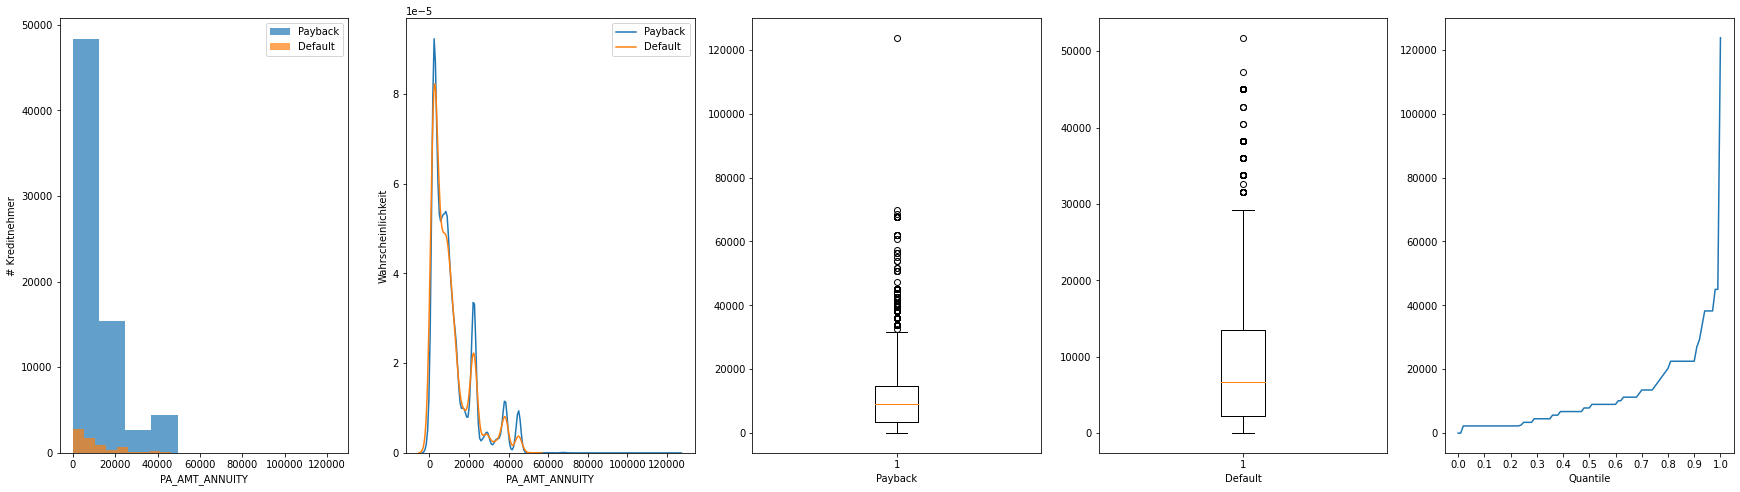

### PA_AMT_APPLICATION

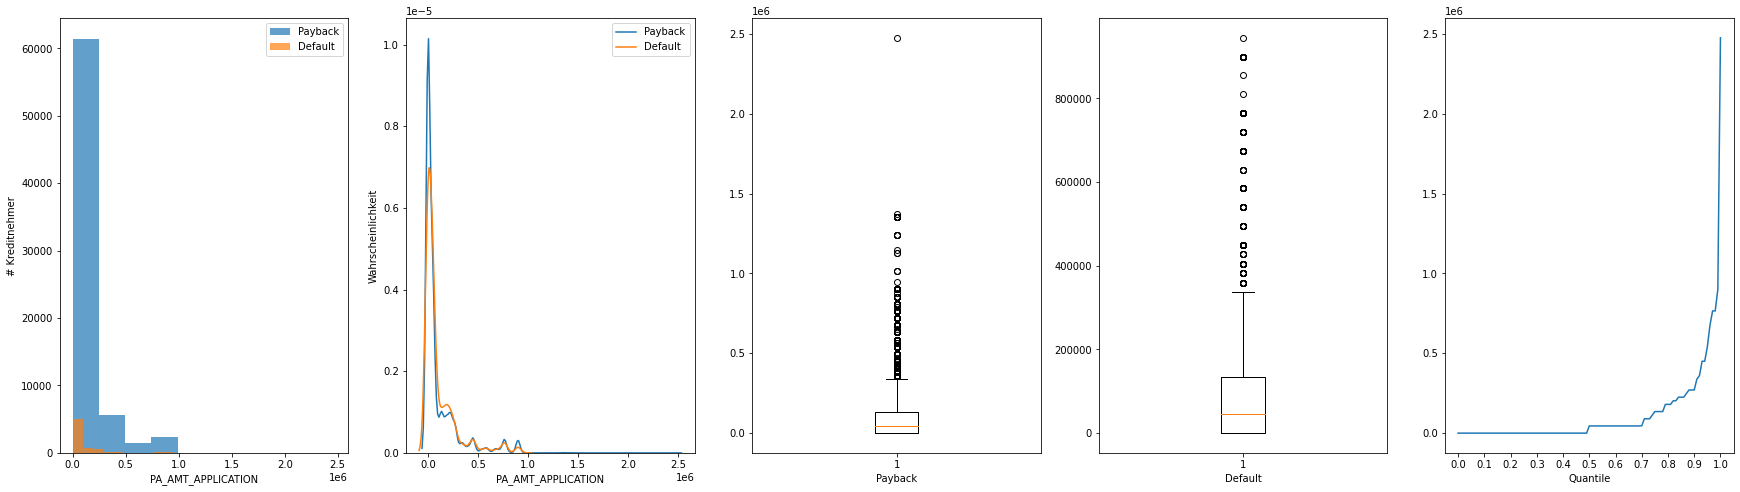

### PA_AMT_CREDIT

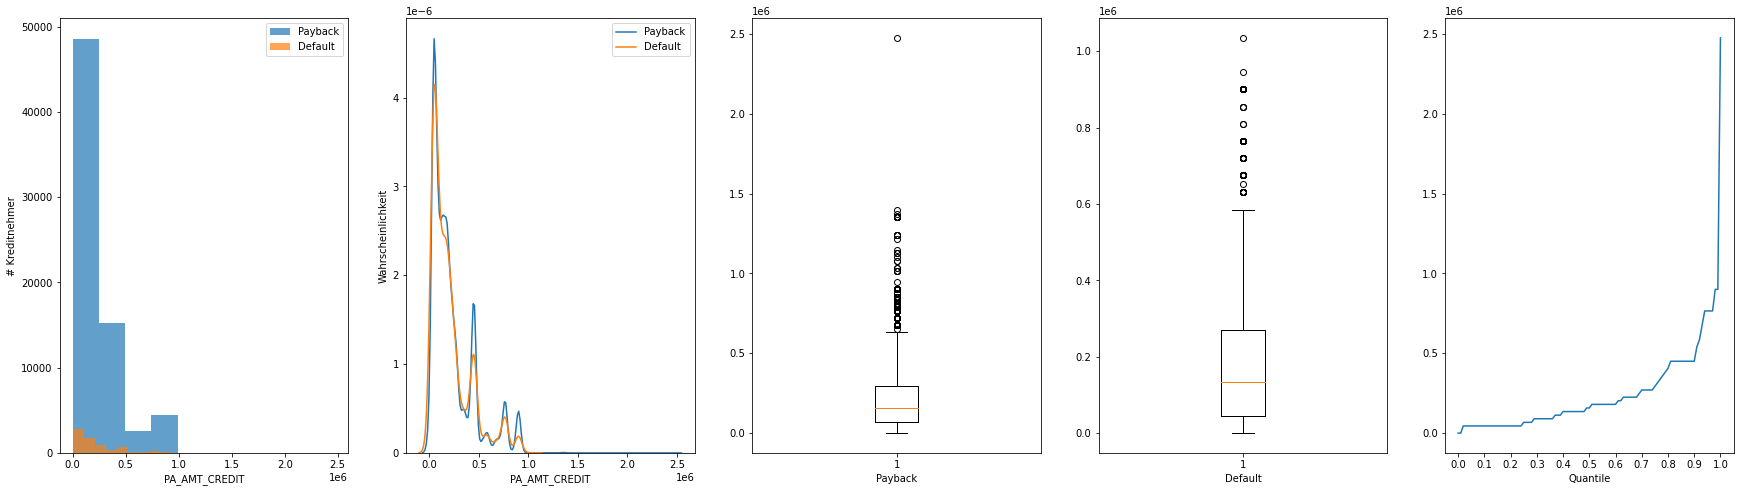

### PA_AMT_GOODS_PRICE

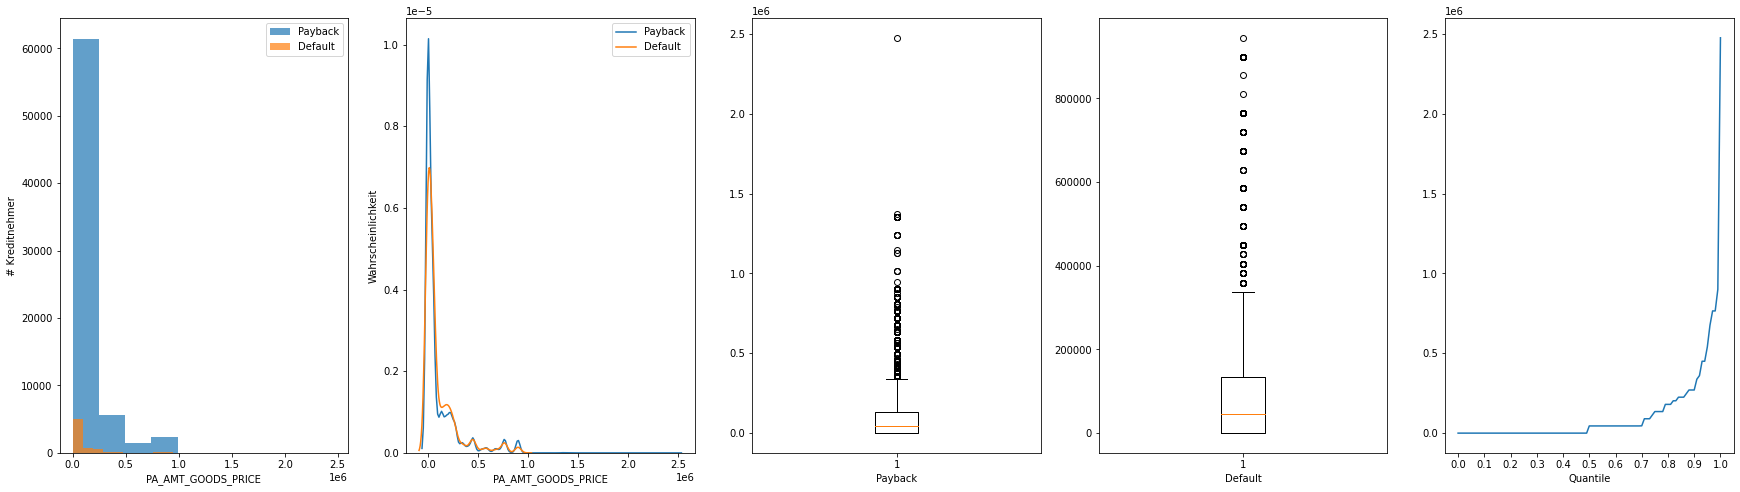

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    fig.set_size_inches(30, 8)

    ax1.hist(pb, alpha=0.7)
    ax1.hist(df, alpha=0.7)
    ax1.legend(labels=["Payback","Default"])
    ax1.set_xlabel(head)
    ax1.set_ylabel("# Kreditnehmer")

    sns.kdeplot(pb, alpha=0.7, ax=ax2)
    sns.kdeplot(df, alpha=0.7, ax=ax2)
    ax2.legend(labels=["Payback","Default"])
    ax2.set_xlabel(head)
    ax2.set_ylabel("Wahrscheinlichkeit")

    a = payback[head].copy()
    a = a.dropna()
    ax3.boxplot(a)
    ax3.set_xlabel("Payback")
    

    b = default[head].copy()
    b = b.dropna()
    ax4.boxplot(b)
    ax4.set_xlabel("Default")

    quantiles = [pa_cc[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
    ax5.plot(np.arange(0,1 + 0.01,0.01), quantiles)
    ax5.set_xticks(np.arange(0,1 + 0.1,0.1))
    ax5.set_xlabel("Quantile")

    plt.show()

In [11]:
todo = ["PA_AMT_ANNUITY","PA_AMT_APPLICATION","PA_AMT_CREDIT","PA_AMT_GOODS_PRICE"]

In [12]:
pa_cc[todo].head()

PA_AMT_ANNUITY  PA_AMT_APPLICATION  PA_AMT_CREDIT  \
SK_ID_CURR                                                      
394447              2250.0             45000.0        45000.0   
361282              2250.0             45000.0        45000.0   
436351              2250.0             45000.0        45000.0   
181153              2250.0             45000.0        45000.0   
309691              2250.0             45000.0        45000.0   

            PA_AMT_GOODS_PRICE  
SK_ID_CURR                      
394447                 45000.0  
361282                 45000.0  
436351                 45000.0  
181153                 45000.0  
309691                 45000.0

In [13]:
todo

['PA_AMT_ANNUITY', 'PA_AMT_APPLICATION', 'PA_AMT_CREDIT', 'PA_AMT_GOODS_PRICE']

PA_AMT_ANNUITY

In [14]:
head = "PA_AMT_ANNUITY"

In [15]:
quantiles = [pa_cc[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

0.00      0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.10  0.11  \
0   0.0  1.818182   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22      0.23  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.218182   

       0.24  0.25  0.26  0.27      0.28  0.29  0.30  0.31  0.32  0.33  0.34  \
0  0.690909   0.0   0.0   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   0.0   

       0.35  0.36  0.37      0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  \
0  0.909091   0.0   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.46      0.47  0.48  0.49      0.50  0.51  0.52  0.53  0.54  0.55  0.56  \
0   0.0  0.909091   0.0   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   0.0   

   0.57  0.58  0.59      0.60  0.61      0.62  0.63  0.64  0.65  0.66  0.67  \
0   0.0   0.0   0.0  0.909091   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   

       0.68      0.69  0.70  0.71  0.72  0.73      0.74      0.75      0.76  \
0  0.909091  0.909091   0.0   0.0   0.0   0.0  0.909091  0.909091  0.909091   

       0.77      0.78      0.79      0.80  0.81  0.82  0.83  0.84  0.85  0.86  \
0  0.909091  0.909091  0.909091  1.818182   0.0   0.0   0.0   0.0   0.0   0.0   

   0.87  0.88  0.89      0.90      0.91      0.92      0.93  0.94  0.95  0.96  \
0   0.0   0.0   0.0  3.636364  1.818182  3.636364  3.636364   0.0   0.0   0.0   

       0.97  0.98       0.99  
0  5.454545   0.0  63.636364

In [16]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [17]:
pa_cc.loc[ID_DROP, head] = np.nan

In [18]:
todo.remove(head)
todo

['PA_AMT_APPLICATION', 'PA_AMT_CREDIT', 'PA_AMT_GOODS_PRICE']

PA_AMT_APPLICATION

In [19]:
head = "PA_AMT_APPLICATION"

In [20]:
quantiles = [pa_cc[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

0.00  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.10  0.11  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.24  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.48      0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  \
0   0.0  1.818182   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.60  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68      0.69    0.70  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.030782  1.7874   

   0.71  0.72      0.73      0.74  0.75  0.76  0.77      0.78  0.79  0.80  \
0   0.0   0.0  0.909091  0.909091   0.0   0.0   0.0  1.818182   0.0   0.0   

       0.81  0.82      0.83  0.84  0.85      0.86      0.87  0.88  0.89  \
0  0.909091   0.0  0.909091   0.0   0.0  0.909091  0.909091   0.0   0.0   

       0.90      0.91      0.92  0.93      0.94      0.95      0.96  0.97  \
0  2.727273  0.909091  3.636364   0.0  3.636364  5.454545  3.636364   0.0   

       0.98       0.99  
0  5.454545  63.636364

In [21]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [22]:
pa_cc.loc[ID_DROP, head] = np.nan

In [23]:
todo.remove(head)
todo

['PA_AMT_CREDIT', 'PA_AMT_GOODS_PRICE']

PA_AMT_CREDIT

In [24]:
head = "PA_AMT_CREDIT"

In [25]:
quantiles = [pa_cc[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

0.00      0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.10  0.11  \
0   0.0  1.818182   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       0.24  0.25  0.26  0.27      0.28  0.29  0.30  0.31  0.32  0.33  0.34  \
0  0.909091   0.0   0.0   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   0.0   

   0.35      0.36  0.37  0.38      0.39  0.40  0.41  0.42  0.43  0.44  0.45  \
0   0.0  0.909091   0.0   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   0.0   

   0.46  0.47      0.48  0.49      0.50  0.51  0.52  0.53  0.54  0.55  0.56  \
0   0.0   0.0  0.909091   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   0.0   

   0.57  0.58  0.59      0.60  0.61      0.62  0.63  0.64  0.65  0.66  0.67  \
0   0.0   0.0   0.0  0.909091   0.0  0.909091   0.0   0.0   0.0   0.0   0.0   

       0.68      0.69  0.70  0.71  0.72  0.73      0.74      0.75      0.76  \
0  0.909091  0.909091   0.0   0.0   0.0   0.0  0.909091  0.909091  0.909091   

       0.77      0.78      0.79      0.80  0.81  0.82  0.83  0.84  0.85  0.86  \
0  0.909091  0.909091  0.909091  1.818182   0.0   0.0   0.0   0.0   0.0   0.0   

   0.87  0.88  0.89      0.90      0.91      0.92      0.93  0.94  0.95  0.96  \
0   0.0   0.0   0.0  3.636364  1.818182  3.636364  3.636364   0.0   0.0   0.0   

       0.97  0.98       0.99  
0  5.454545   0.0  63.636364

In [26]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [27]:
pa_cc.loc[ID_DROP, head] = np.nan

In [28]:
todo.remove(head)
todo

['PA_AMT_GOODS_PRICE']

PA_AMT_GOODS_PRICE

In [29]:
head = "PA_AMT_GOODS_PRICE"

In [30]:
quantiles = [pa_cc[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

0.00  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.10  0.11  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.20  0.21  0.22  0.23  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.24  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  0.46  0.47  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.48      0.49  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  \
0   0.0  1.818182   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   0.60  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68      0.69    0.70  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.030782  1.7874   

   0.71  0.72      0.73      0.74  0.75  0.76  0.77      0.78  0.79  0.80  \
0   0.0   0.0  0.909091  0.909091   0.0   0.0   0.0  1.818182   0.0   0.0   

       0.81  0.82      0.83  0.84  0.85      0.86      0.87  0.88  0.89  \
0  0.909091   0.0  0.909091   0.0   0.0  0.909091  0.909091   0.0   0.0   

       0.90      0.91      0.92  0.93      0.94      0.95      0.96  0.97  \
0  2.727273  0.909091  3.636364   0.0  3.636364  5.454545  3.636364   0.0   

       0.98       0.99  
0  5.454545  63.636364

In [31]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [32]:
pa_cc.loc[ID_DROP, head] = np.nan

In [33]:
todo.remove(head)
todo

[]

## Plot Ergebnisse

In [34]:
payback = pa_cc.loc[ID_Payback]
default = pa_cc.loc[ID_Default]

### PA_AMT_ANNUITY

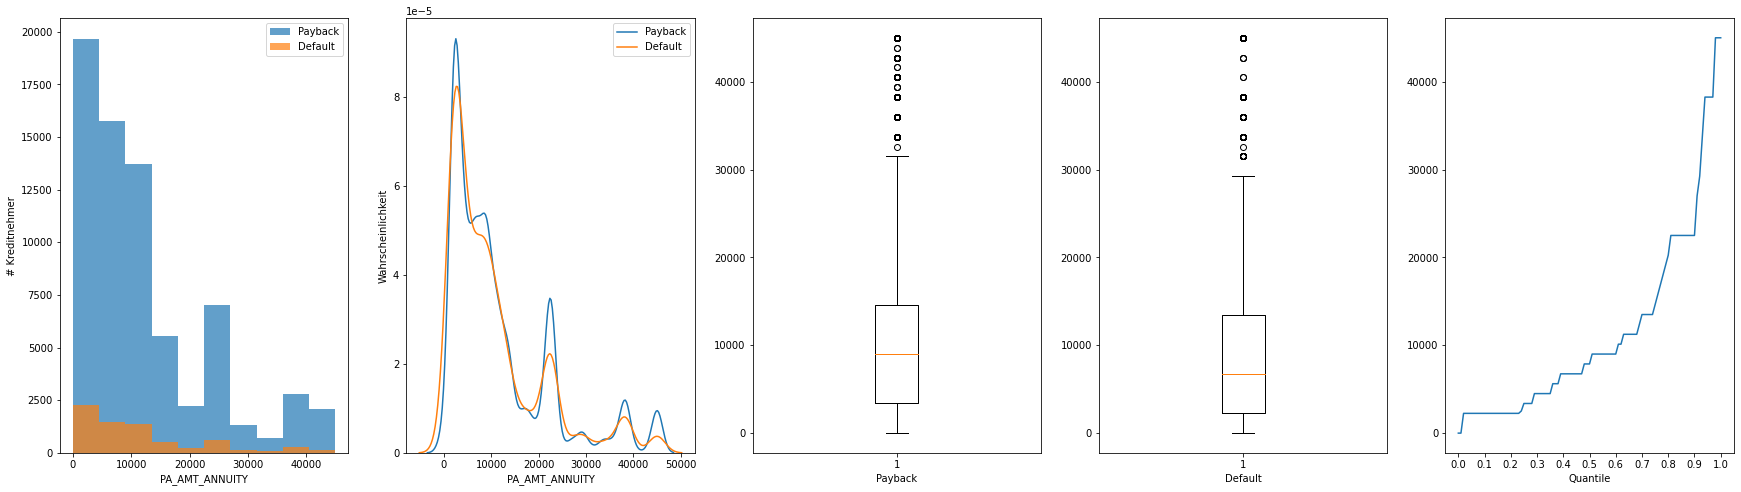

### PA_AMT_APPLICATION

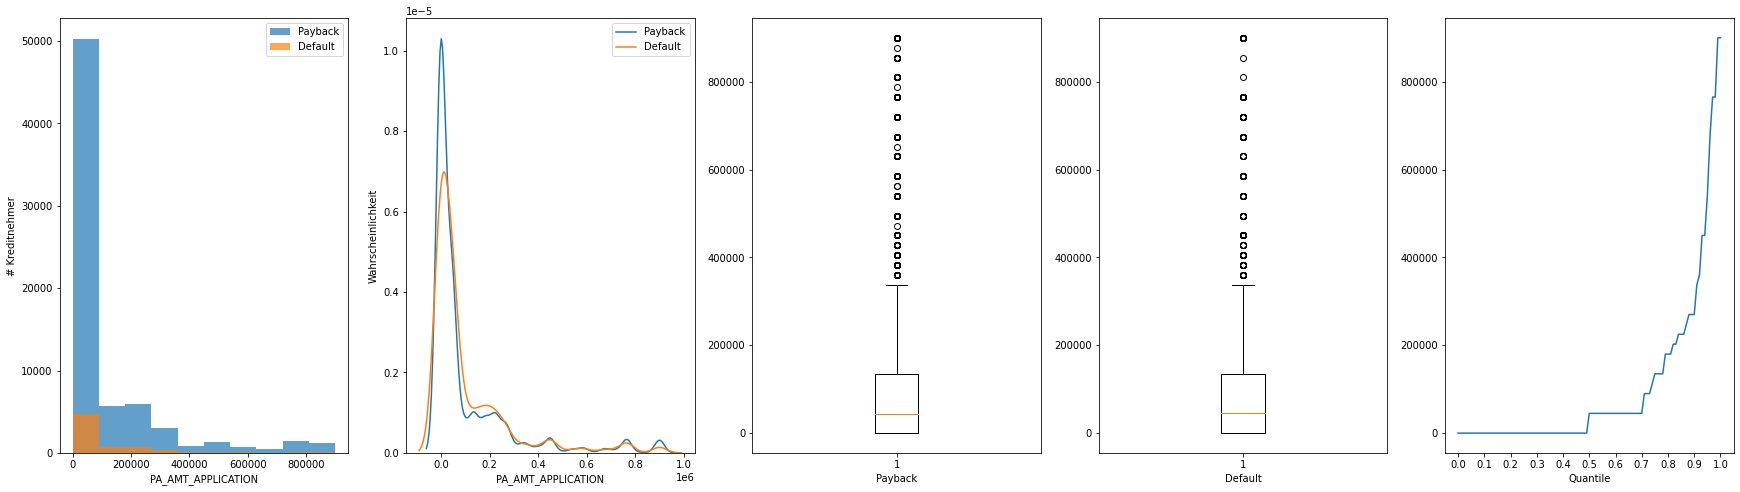

### PA_AMT_CREDIT

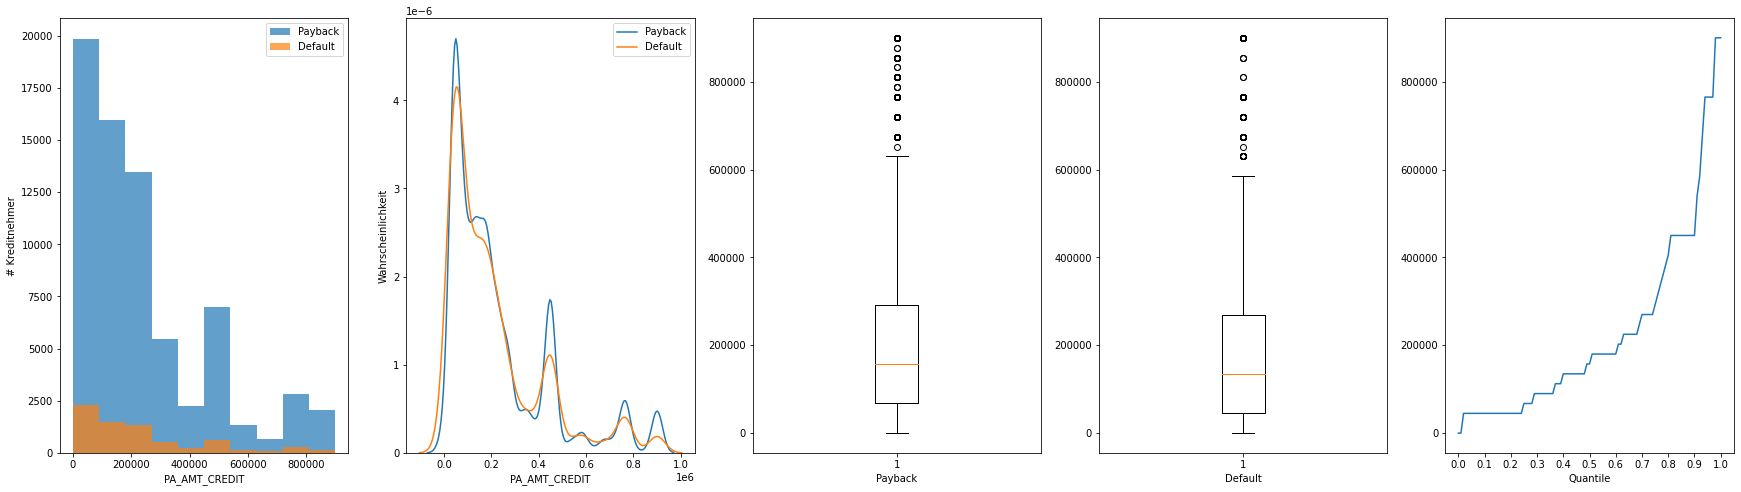

### PA_AMT_GOODS_PRICE

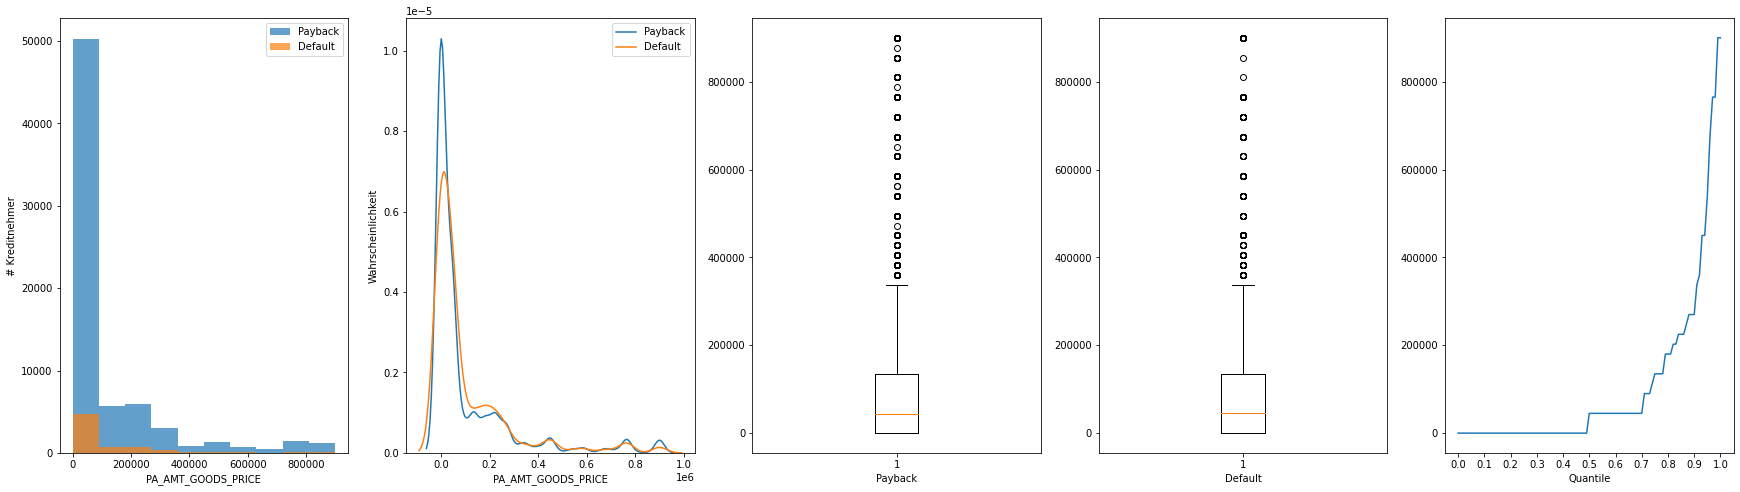

In [35]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    fig.set_size_inches(30, 8)

    ax1.hist(pb, alpha=0.7)
    ax1.hist(df, alpha=0.7)
    ax1.legend(labels=["Payback","Default"])
    ax1.set_xlabel(head)
    ax1.set_ylabel("# Kreditnehmer")

    sns.kdeplot(pb, alpha=0.7, ax=ax2)
    sns.kdeplot(df, alpha=0.7, ax=ax2)
    ax2.legend(labels=["Payback","Default"])
    ax2.set_xlabel(head)
    ax2.set_ylabel("Wahrscheinlichkeit")

    a = payback[head].copy()
    a = a.dropna()
    ax3.boxplot(a)
    ax3.set_xlabel("Payback")
    

    b = default[head].copy()
    b = b.dropna()
    ax4.boxplot(b)
    ax4.set_xlabel("Default")

    quantiles = [pa_cc[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
    ax5.plot(np.arange(0,1 + 0.01,0.01), quantiles)
    ax5.set_xticks(np.arange(0,1 + 0.1,0.1))
    ax5.set_xlabel("Quantile")

    plt.show()

In [36]:
pa_cc.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "pa_cc.csv")